In [36]:
import geopandas as gpd
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

In [37]:
data = pd.read_csv('/content/drive/MyDrive/PSDV/Data.csv')
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
funding = pd.read_csv('/content/drive/MyDrive/PSDV/NCAP_Funding.csv')
funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [39]:
State = pd.read_csv('/content/drive/MyDrive/PSDV/State_data.csv')
State.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


# Spacial Aggregation

# 1.

In [ ]:
state = (data.groupby('state')['PM2.5'].mean())
state.dropna(inplace=True)
mxm = state.idxmax()
mxm

'Delhi'

Since we wanted to take the highest average value, we need average for which we use groupby. We get a series called state of which we take the max.

# 2.

In [ ]:
#state = data['PM2.5'] > 300
#data[state] this will give us all >300 or equivalently
data_2023 = data.query("Timestamp >= '2023-01-01' and Timestamp <= '2023-12-31'")
state = data_2023[data_2023['PM2.5'] > 300]
num = (state.groupby('state')['PM2.5'].count()).idxmax()
num

'Delhi'

We first use query method to get the appropriate date and then use boolean masking to get > 300 data. Then we group by the states and use count(). It is imperative to note that value_counts is not used. Count operates along the rows, whereas value_counts will return the count of the values along the column.


# 3.

In [ ]:
data_2023 = data.query("Timestamp >= '2023-01-01' and Timestamp <= '2023-12-31'")
state = data_2023.groupby('state')['PM2.5'].std()
var = state.idxmax()
var

'Delhi'

We use query method to get the apt data, and then since we can measure variability using standard deviation, we use the std() method in addition to groupby. We then use idxman to get the state that corresponds to the highest variability.

# 4.

In [ ]:
data_20_21 = data.query("Timestamp >= '2020-01-01' and Timestamp <= '2021-12-31'")
state = data_20_21.groupby('state')['PM2.5'].mean()
mnm = state.idxmin()
mnm

'Mizoram'

We adjusted the dates of the queries and instead of idxmax(), we used idxmin().



# Temporal Aggregation.

# 1.

In [ ]:
data_aug_2020 = data.query("Timestamp >= '2020-08-01' and Timestamp <= '2020-08-31'")
station = data_aug_2020.groupby('station')['PM2.5'].max()
station.dropna(inplace = True)
mxm = station.idxmax()
mxm

'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'

# 2.

In [41]:
#summer
data_2018_Lal = data.query("Timestamp >= '2018-03-01' and Timestamp <= '2018-05-31' and station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'")
data_2018_Lal.dropna(inplace=True)
sum_avg = data_2018_Lal['PM2.5'].mean()
#monsoon
data_2018_Lal = data.query("Timestamp >= '2018-06-01' and Timestamp <= '2018-09-30' and station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'")
data_2018_Lal.dropna(inplace=True)
mon_avg= data_2018_Lal['PM2.5'].mean()
#winter
data_2018_Lal = data.query("Timestamp <= '2019-02-28' and Timestamp >= '2018-12-01' and station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'")
data_2018_Lal.dropna(inplace=True)
win_avg = data_2018_Lal['PM2.5'].mean()
sea_avg = pd.DataFrame({'Season_avg':(sum_avg,mon_avg,win_avg)},index=('Summer','Moonsoon','Winter'))
print(sea_avg)
sea_avg.dropna(inplace=True)
print(sea_avg["Season_avg"].idxmax())

          Season_avg
Summer           NaN
Moonsoon   34.425196
Winter     68.487521
Winter


# 3.

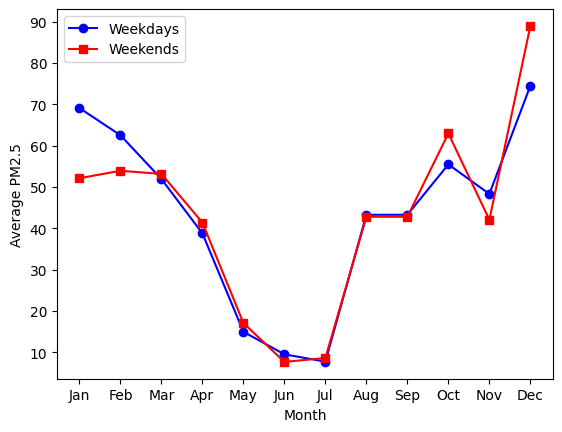

In [ ]:
#temporal.3
df = data.query("station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB' and Timestamp >= '2021-01-01' and Timestamp <= '2021-12-31'")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['weekday'] = df['Timestamp'].dt.weekday
df['month'] = df['Timestamp'].dt.month
df_weekday = df[df['weekday'] < 5]
df_weekend = df[df['weekday'] >= 5]
res1 = df_weekday.groupby('month')['PM2.5'].mean()
res2 = df_weekend.groupby('month')['PM2.5'].mean()
#so now finally we have weekdays and weekends
#we do mean imputation.
fin_res1 = res1.mean()
fin_res2 = res2.mean()
res1 = res1.fillna(fin_res1)
res2 = res2.fillna(fin_res2)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, res1, marker='o', color='blue', label='Weekdays')
plt.plot(months, res2, marker='s', color='red', label='Weekends')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.legend()
plt.show()


# Spatio-temporal Aggregation

# 1.

In [42]:
#first calc for monsoon
df1 = data.query("Timestamp >= '2022-06-01' and Timestamp <= '2022-09-30'")
res1 = df1.groupby('state')['PM2.5'].mean()
#now for summer
df2 = data.query("Timestamp >= '2022-03-01' and Timestamp <= '2022-05-31'")
res2 = df2.groupby('state')['PM2.5'].mean()
res3 = (res2 - res1)/res2 * 100
display(res3)
res3.idxmax()

,PM2.5
state,
Andhra Pradesh,35.756894
Arunachal Pradesh,53.077110
Assam,61.176419
Bihar,53.000042
Chandigarh,45.124242
Chhattisgarh,10.975330
Delhi,55.293579
Gujarat,44.937747
Haryana,48.704688


'Assam'

Explanation: First I calculated for the monsoon season, and then the summer season. Then, to get the variation in the seasons, we took how much differed from the mean.


# 2.

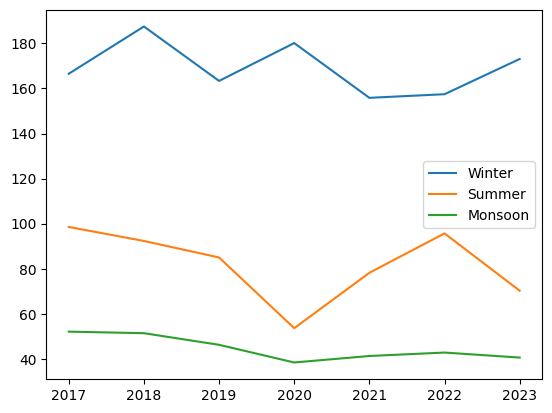

In [ ]:
lwin = list()
lsum = list()
lmon = list()
for i in range(2017, 2024):
  res1 = (data.query(f"Timestamp >= '{i}-12-01' and Timestamp <= '{i + 1}-02-28' and state == 'Delhi'"))['PM2.5'].mean()
  res2 = (data.query(f"Timestamp >= '{i}-03-01' and Timestamp <= '{i}-05-31' and state == 'Delhi'"))['PM2.5'].mean()
  res3 = (data.query(f"Timestamp >= '{i}-06-01' and Timestamp <= '{i}-09-30' and state == 'Delhi'"))['PM2.5'].mean()

  lwin.append(res1)
  lsum.append(res2)
  lmon.append(res3)
finalwin = np.array(lwin)
finalsum = np.array(lsum)
finalmon = np.array(lmon)
years = np.array([2017,2018,2019,2020,2021,2022,2023])
plt.plot(years, finalwin, label = 'Winter')
plt.plot(years, finalsum, label = 'Summer')
plt.plot(years, finalmon, label = 'Monsoon')
plt.legend()
plt.show()

Explanation: We have used f-string and for loop to enumerate data over the years. There was one cutoff in winter data, the year 2017. Before that, the data was not given and hence we have plotted it starting from january of that year.

# 3.

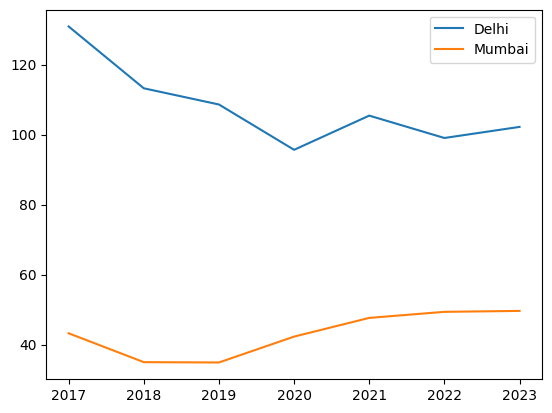

Delhi has more fluctuations


In [ ]:
list1 = list()
list2 = list()
for i in range(2015, 2024):
  res = (data.query(f"Timestamp >= '{i}-01-01' and Timestamp <= '{i}-12-31' and state == 'Delhi'"))['PM2.5'].mean()
  res2 = (data.query(f"Timestamp >= '{i}-01-01' and Timestamp <= '{i}-12-31' and city == 'Mumbai'"))['PM2.5'].mean()
  list1.append(res)
  list2.append(res2)
final1 = np.array(list1)
final2 = np.array(list2)
year = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
years = np.array(year)
plt.plot(years, final1, label = 'Delhi')
plt.plot(years, final2, label = 'Mumbai')
plt.legend()
plt.show()
res1 = final1.std()
res2 = final2.std()
if res2 > res1:
  print('Mumbai has more fluctuations')
else:
  print('Delhi has more fluctuations')

Remark: The data is correct as per internet check. Explanation: We have run a simple for loop using an f string over the years. This has led us to the following graph.

Ans: Yes, Air Quality in terms of PM2.5 improved significantly. This is in confirmation with several internet sources as well. Explanation: We selected the state witht the highest sum of funding as asked and then plotted it over the available years using a for loop.

# Population Based

# 1

In [ ]:
data.drop_duplicates('station',inplace=True)
data_1 = data.groupby('state')['station'].count()
pop_state = pd.merge(data_1,State,left_on='state',right_on='State',how='inner')
pop_state['station/population'] = pop_state['station']/pop_state['Population']
a= pop_state['station/population'].idxmax()
print(pop_state['State'][a],'\n')


Chandigarh 



# 2.

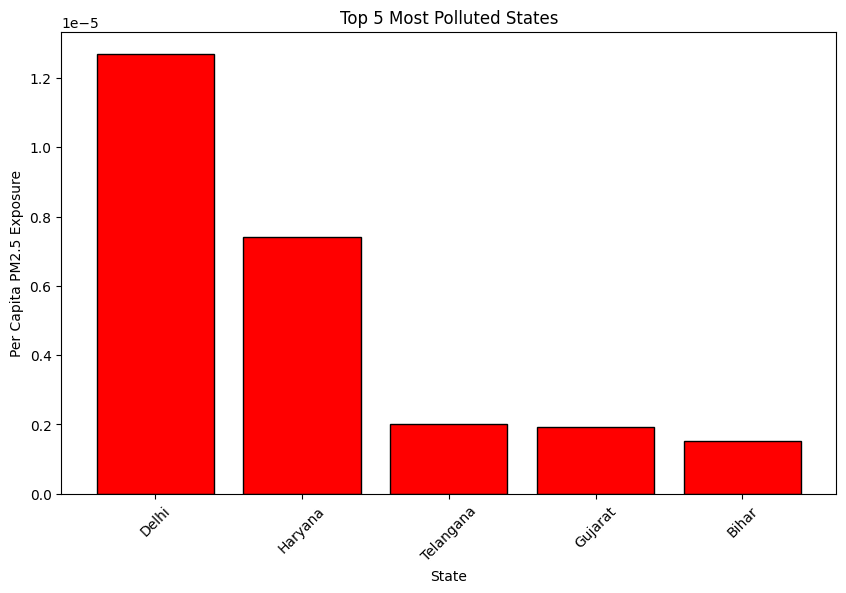

In [ ]:
df_pm_total = data.groupby("state")["PM2.5"].mean().reset_index()

df_merger = df_pm_total.merge(State, left_on="state", right_on='State')

df_merger["Per_Capita_2.5"] = df_merger["PM2.5"] / df_merger["Population"]

sorted_df=df_merger.sort_values(by='Per_Capita_2.5',ascending=False)

sorted_df_2=sorted_df[['State','Per_Capita_2.5']].head()

sorted_df_2

plt.figure(figsize=(10, 6))
plt.bar(sorted_df_2["State"], sorted_df_2["Per_Capita_2.5"], color="red",edgecolor='k')

plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States")
plt.xticks(rotation=45)

plt.show()

# 3.

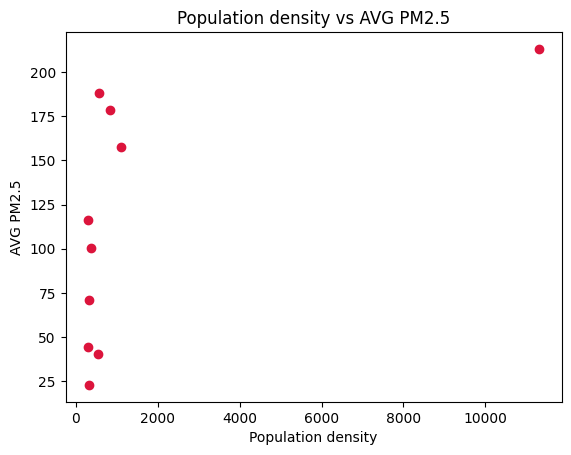

In [ ]:
state_pollution = data.groupby("state")["PM2.5"].mean()
State['pop/sq.km'] = State['Population']/State['Area (km2)']
State.sort_values("State",inplace=True)
plt.scatter(State['pop/sq.km'],
state_pollution,c='crimson')
plt.xlabel("Population density")
plt.ylabel("AVG PM2.5")
plt.title("Population density vs AVG PM2.5")
plt.show()

 We can conclude that the states with lower population density have the higher pollution level.

# Area based

# 1.

Delhi


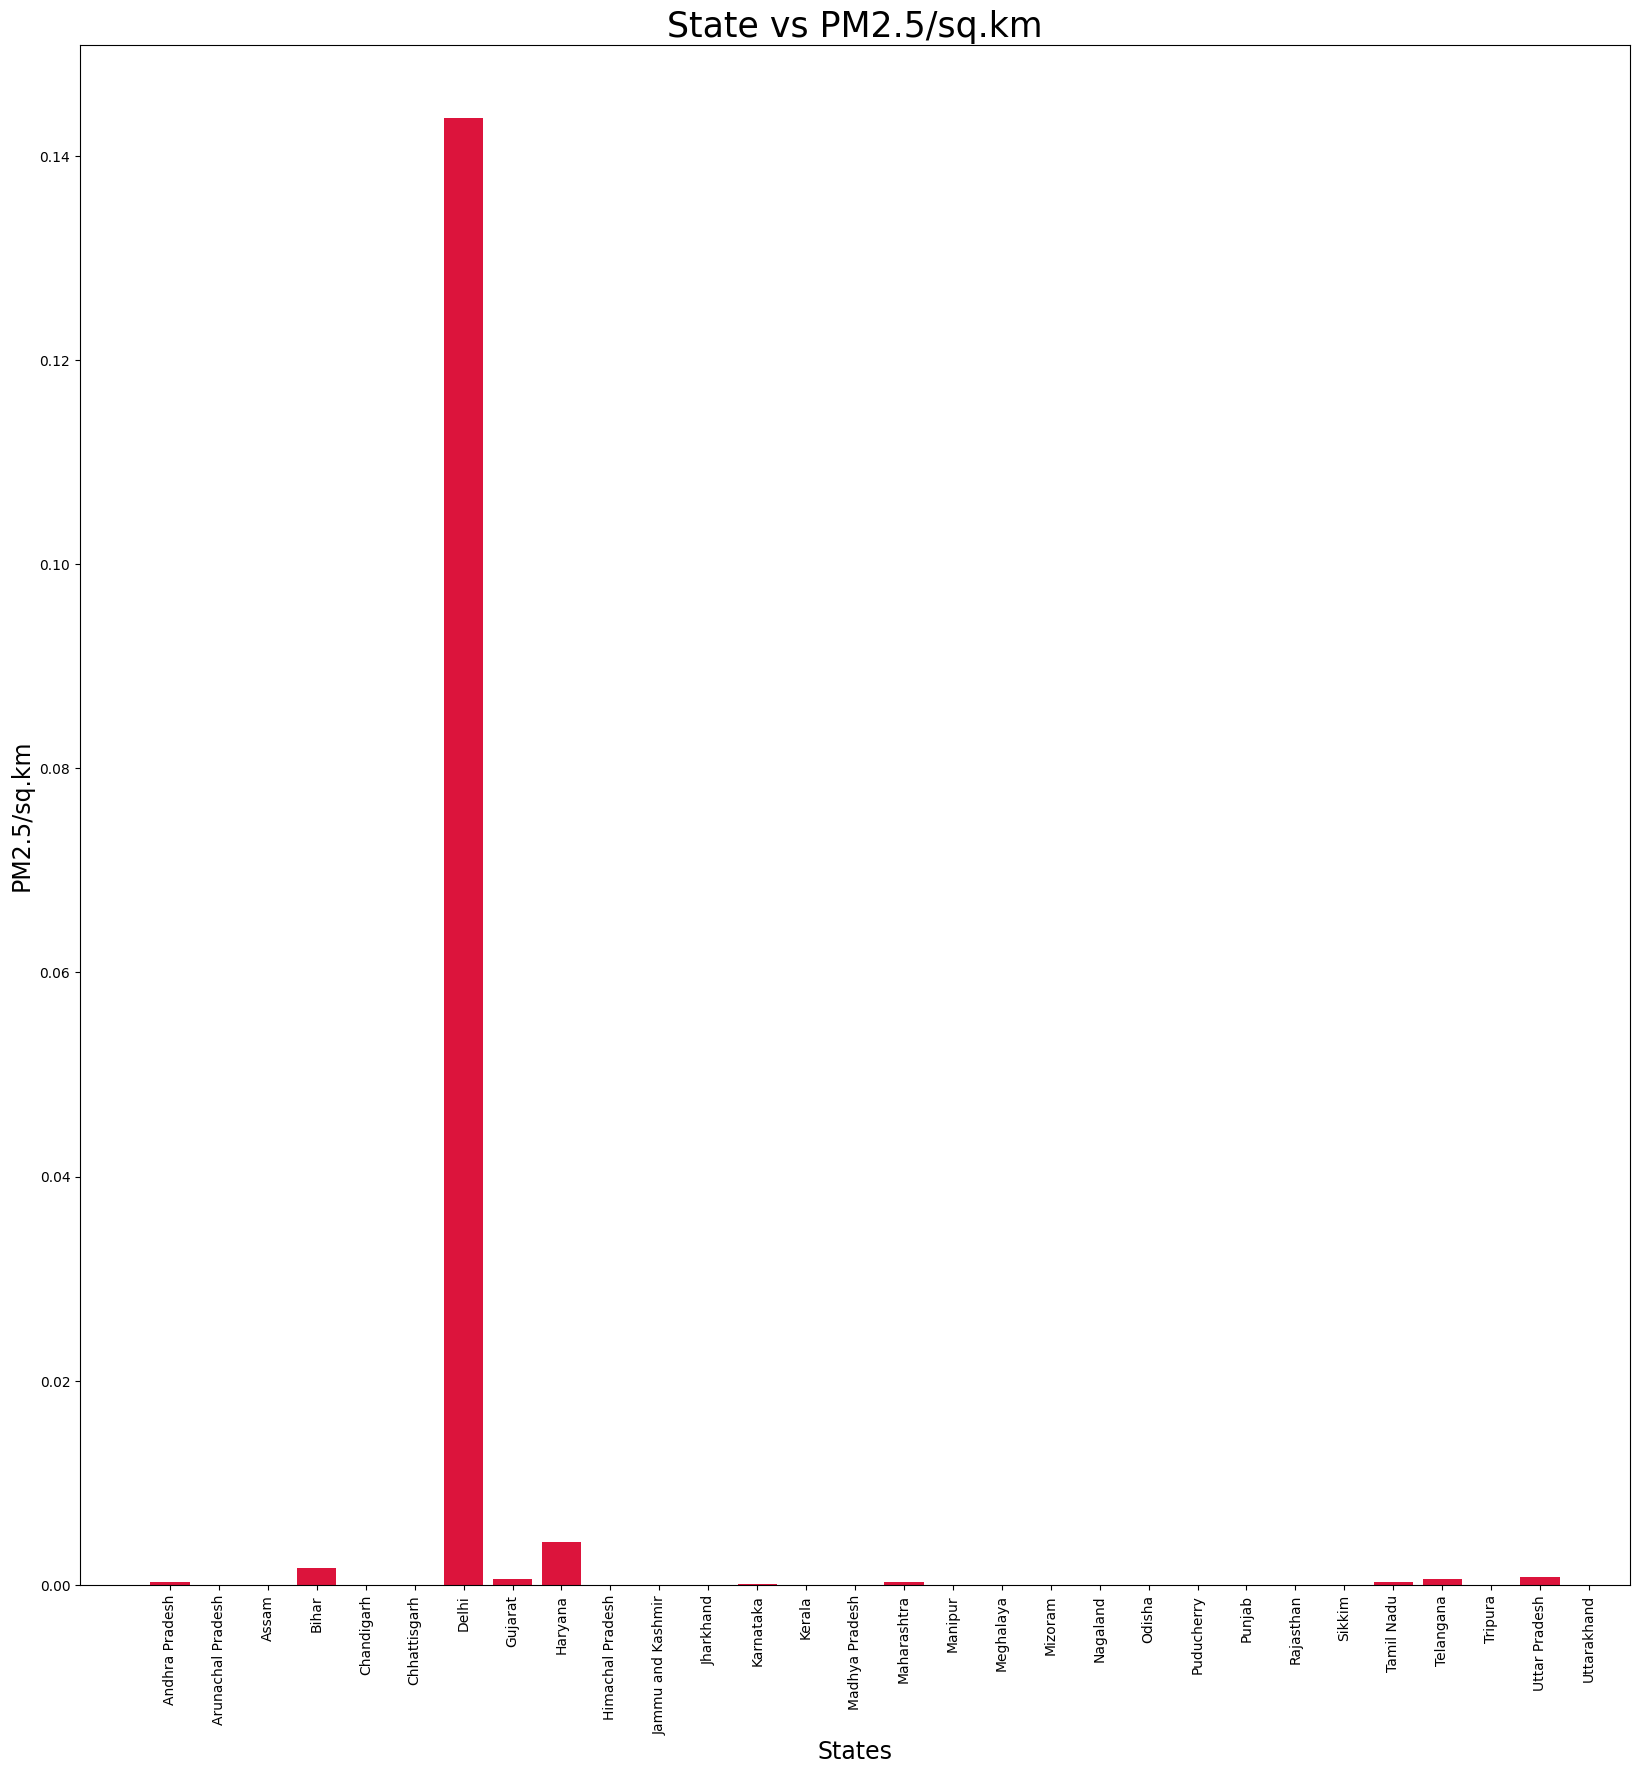

In [ ]:
data_1 = data.groupby('state')['PM2.5'].mean()
area_state = pd.merge(data_1,State,left_on='state',right_on='State',how='inner')
area_state['PM2.5/sq.km'] = area_state['PM2.5']/area_state['Area (km2)']
a= area_state['PM2.5/sq.km'].idxmax()
print(area_state['State'][a])
plt.figure(figsize=(20,20))
plt.bar(area_state['State'],area_state['PM2.5/sq.km'],color='crimson')
plt.xticks(rotation=90)
plt.xlabel("States",fontsize=17)
plt.ylabel("PM2.5/sq.km",fontsize=17)
plt.title("State vs PM2.5/sq.km",fontsize=25)
plt.show()

# 2.

Delhi 



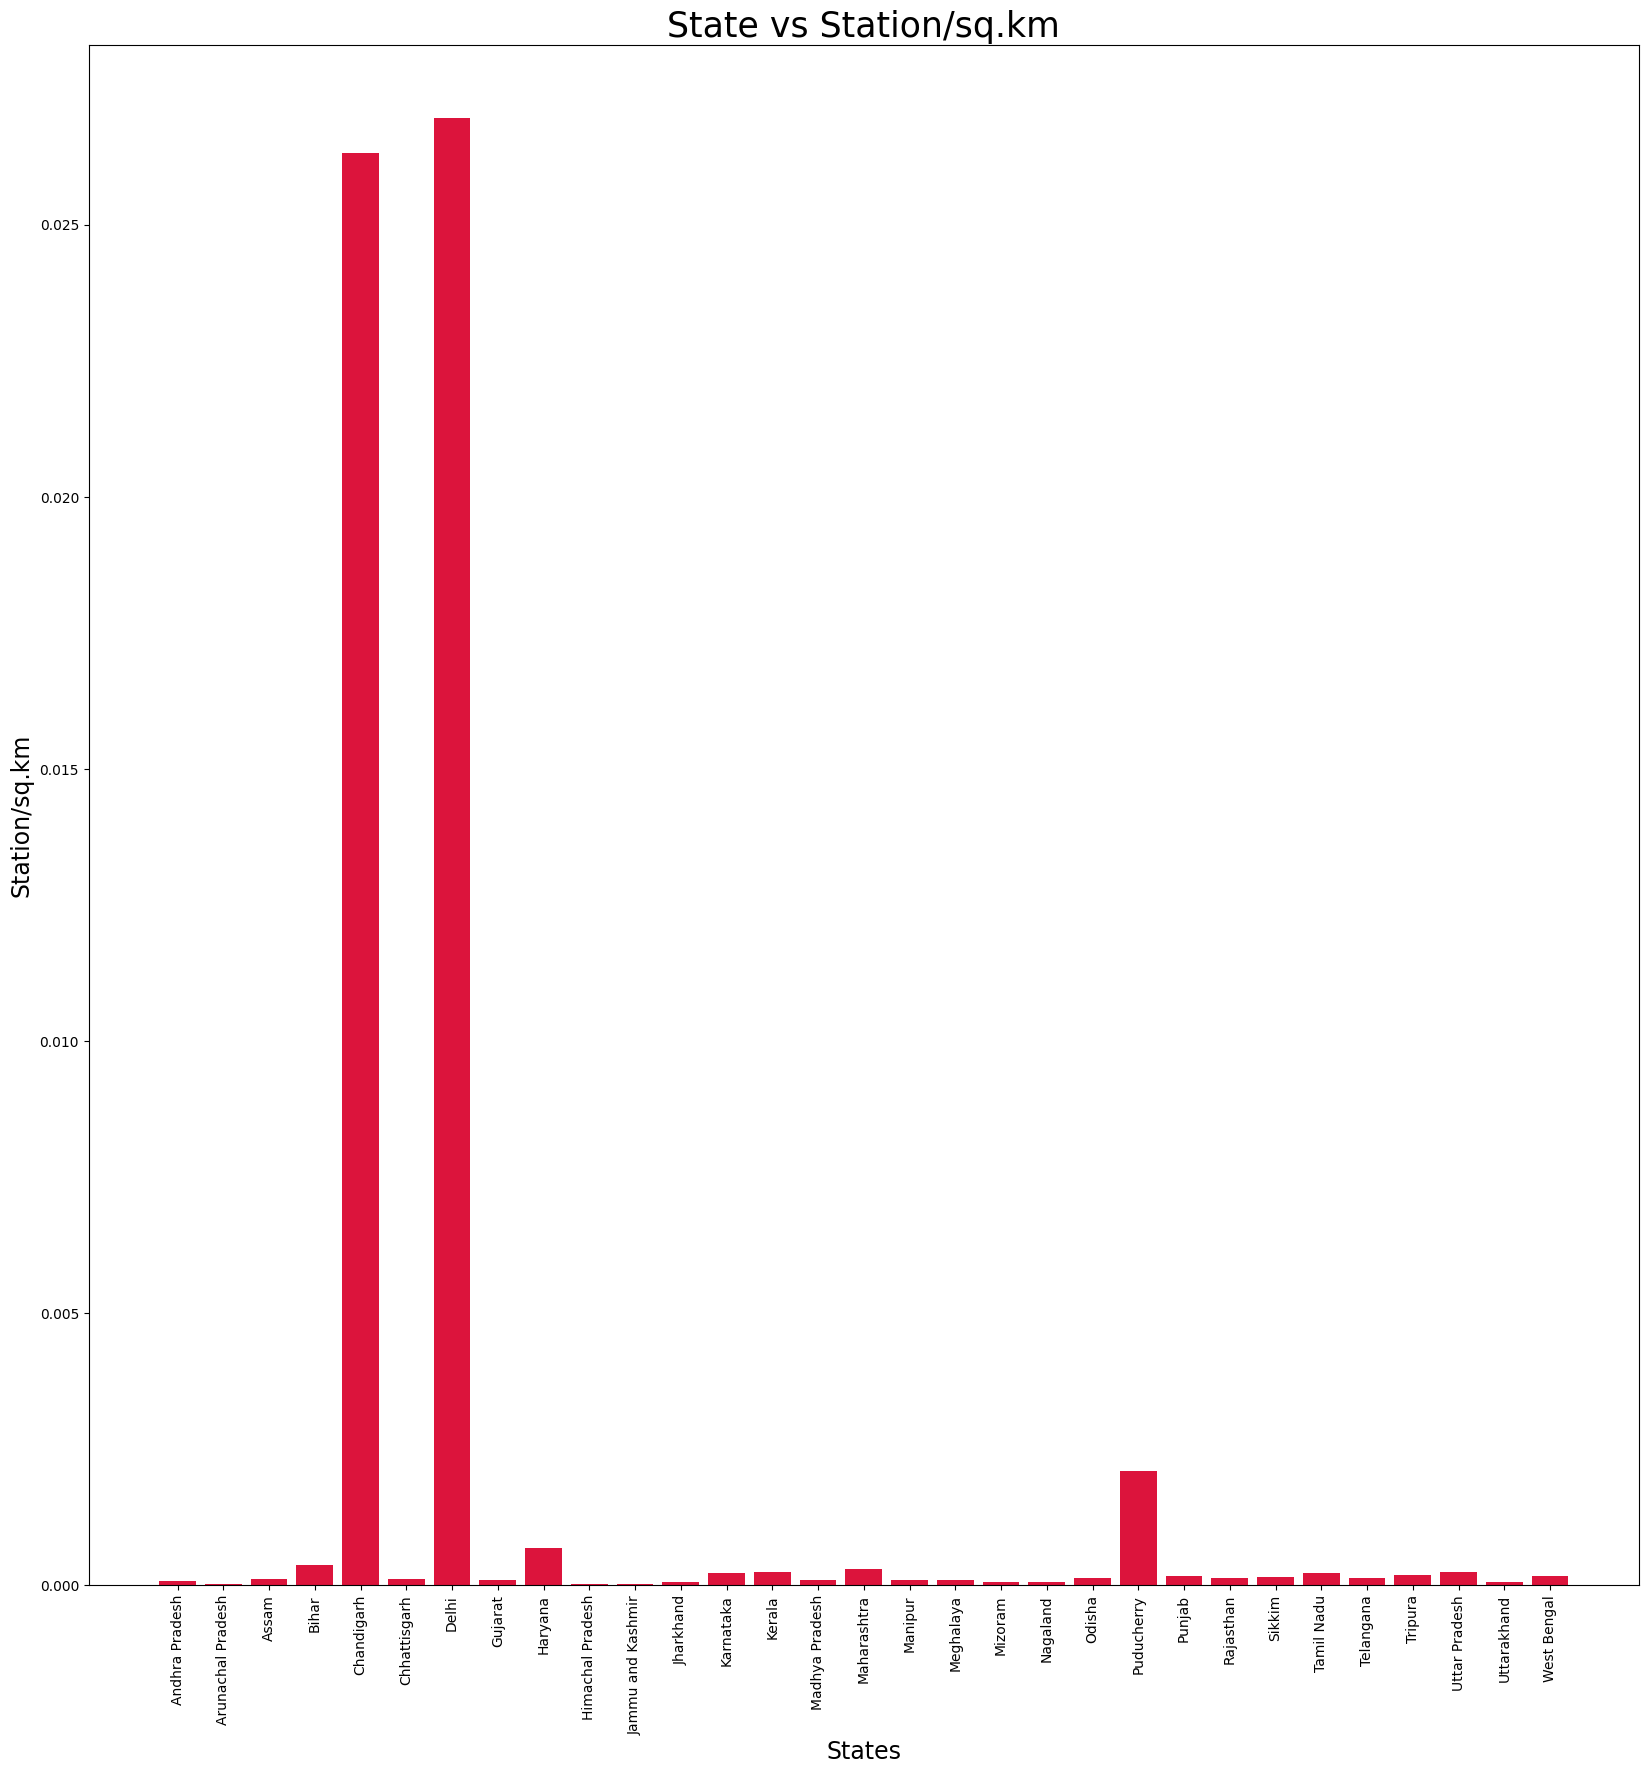

In [ ]:
data.drop_duplicates('station',inplace=True)
data_1 = data.groupby('state')['station'].count()
area_state = pd.merge(data_1,State,left_on='state',right_on='State',how='inner')
area_state['station/sq.km'] = area_state['station']/area_state['Area (km2)']
a= area_state['station/sq.km'].idxmax()
print(area_state['State'][a],'\n')
plt.figure(figsize=(20,20))
plt.bar(area_state['State'],area_state['station/sq.km'],color='crimson')
plt.xticks(rotation=90)
plt.xlabel("States",fontsize=17)
plt.ylabel("Station/sq.km",fontsize=17)
plt.title("State vs Station/sq.km",fontsize=25)
plt.show()


# 3.

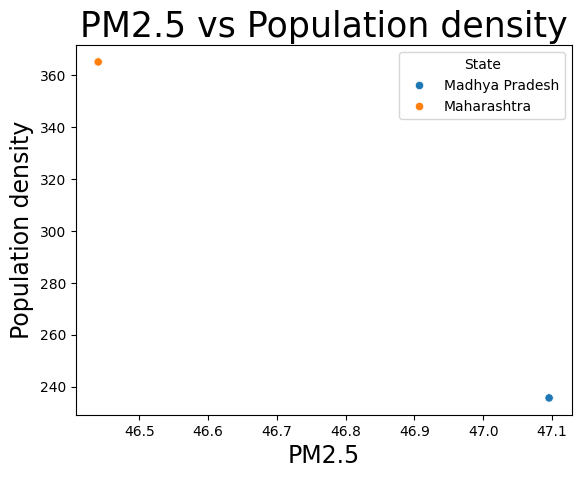

In [ ]:
data_2021 = data.query("Timestamp >= '2021-01-01' and Timestamp <= '2021-12-31'")
data_2021 = data_2021.query("state == 'Maharashtra' or state == 'Madhya Pradesh'")
data_2021 = data_2021.groupby('state')['PM2.5'].mean()
data_2021 = pd.merge(data_2021,State,left_on='state',right_on='State',how='inner')
data_2021['population density'] = data_2021['Population']/data_2021['Area (km2)']
sns.scatterplot(x=data_2021['PM2.5'],y=data_2021['population density'],hue=data_2021['State'])
plt.xlabel("PM2.5",fontsize=17)
plt.ylabel("Population density",fontsize=17)
plt.title("PM2.5 vs Population density",fontsize=25)
plt.show()

# Funding Based

# 1.   ....

In [9]:
funding['Amount released during FY 2021-22'] = pd.to_numeric(funding['Amount released during FY 2021-22'].replace('-', None))
funding['State'] = funding['State'].replace({'Jammu & Kashmir': 'Jammu and Kashmir'})
res1 = funding[funding['Amount released during FY 2021-22'].notna()]
to_see = res1['State'].unique()

res2 = funding[funding['Amount released during FY 2021-22'].isna()]
to_see2 = res2['State'].unique()
res_avg = data.groupby('state')['PM2.5'].mean()
res_avg2 = data.groupby('state')['PM2.5'].mean()
cmn = set(to_see) & set(to_see2)
to_see2_filter= [state for state in to_see2 if state not in cmn]
res_avg1_filter = res_avg[to_see]
res_avg2_filter = res_avg[to_see2_filter]
print(res_avg1_filter, res_avg2_filter)


state
Andhra Pradesh        35.049347
Bihar                 76.918759
Chandigarh            56.666803
Delhi                104.100918
Himachal Pradesh      62.516878
Jammu and Kashmir     28.574696
Karnataka             28.894840
Madhya Pradesh        45.874375
Maharashtra           43.491415
Meghalaya             24.513390
Nagaland              33.439550
Odisha                52.109504
Telangana             38.114469
Uttar Pradesh         70.893996
Uttarakhand           36.788767
Name: PM2.5, dtype: float64 state
Assam           57.962372
Chhattisgarh    28.761571
Gujarat         52.462657
Jharkhand       54.281545
Punjab          52.243166
Rajasthan       54.230341
Tamil Nadu      31.289620
West Bengal     54.611086
Name: PM2.5, dtype: float64


# 2.

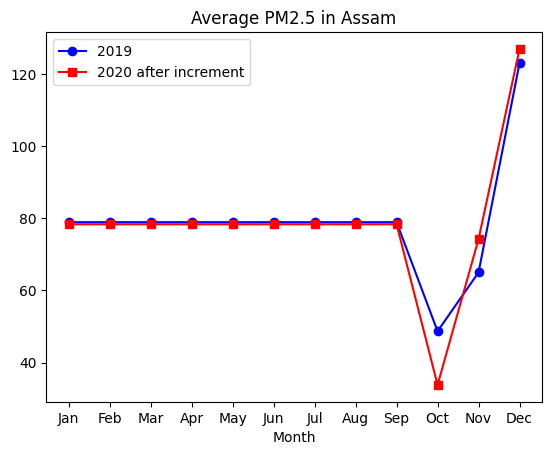

In [ ]:
df = funding[funding['State'] == 'Assam']
lis1 = list()
lis2 = list()
for i in range (1, 13):
  res1 = data.query(f"Timestamp >= '2019-{i}-01' and Timestamp <= '2019-{i}-31' and state == 'Assam'")
  res2 = data.query(f"Timestamp >= '2020-{i}-01' and Timestamp <= '2020-{i}-31' and state == 'Assam'")
  res1.dropna(inplace=True)
  res2.dropna(inplace=True)
  res1_avg = res1['PM2.5'].mean()
  res2_avg = res2['PM2.5'].mean()
  lis1.append(res1_avg)
  lis2.append(res2_avg)
fin_res = pd.Series(lis1)
fin_res2 = pd.Series(lis2)
fin_res.fillna(fin_res.mean(), inplace=True)
fin_res2.fillna(fin_res2.mean(), inplace=True)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, fin_res, marker='o', color='blue', label='2019 ')
plt.plot(months, fin_res2, marker='s', color='red', label='2020 after increment')
plt.legend()
plt.title("Average PM2.5 in Assam")
plt.xlabel('Month')
plt.show()

# 3.

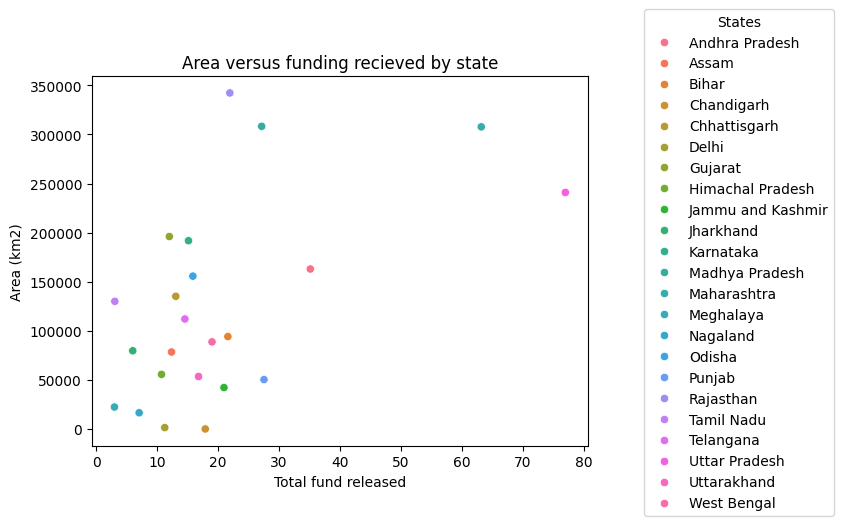

In [ ]:
state_fund = funding.groupby('State')['Total fund released'].sum()
state = pd.merge(state_fund,State,left_on='State',right_on='State')
sns.set_style(rc={'figure.figsize':(20,20)})
s=sns.scatterplot(x = state['Total fund released'], y = state['Area (km2)'],hue=state['State'],)
s.legend(bbox_to_anchor=(1.1, 1.2),title='States')
plt.title("Area versus funding recieved by state")
plt.show()


# Miscellaneous Question

# 1.


In [ ]:
res = data.query("Timestamp >= '2023-01-01' and Timestamp <= '2023-12-31'")
res = res.groupby('state')['PM2.5'].mean()
df = data[data['state'] == res.idxmax()]
df.dropna(inplace = True)
res = df['PM2.5'] > 300
ans = res.size / df.size * 100
print(ans)

11.11111111111111


# 2.

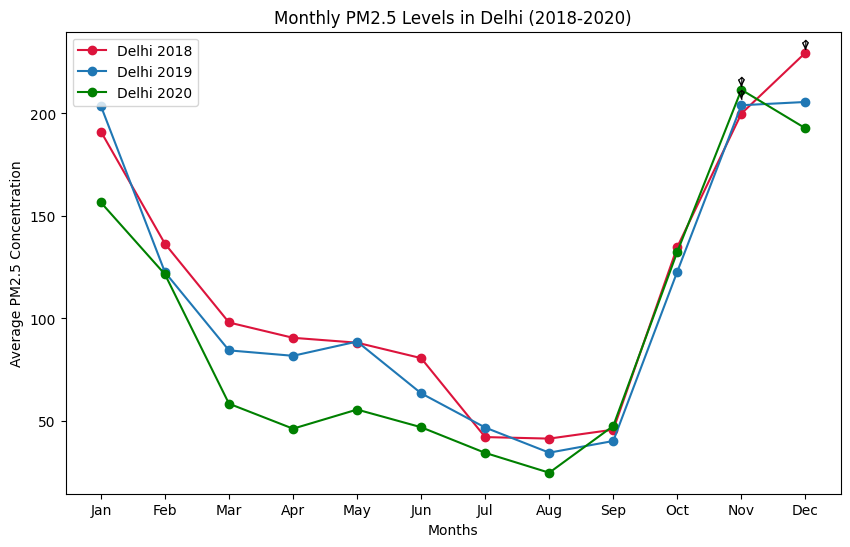

In [35]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
list1 = list()
for i in range(2018, 2021):
    list2 = list()
    for j in range(1, 13):
        res = data.query(f"Timestamp >= '{i}-{j:02d}-01' and Timestamp <= '{i}-{j:02d}-31' and state == 'Delhi'")
        list2.append(res['PM2.5'].mean())
    list1.append(list2)
plt.figure(figsize=(10, 6))
plt.plot(months, list1[0], label='Delhi 2018', marker='o',color='crimson')
plt.plot(months, list1[1], label='Delhi 2019', marker='o')
plt.plot(months, list1[2], label='Delhi 2020', marker='o',color='green')
plt.xlabel("Months")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Monthly PM2.5 Levels in Delhi (2018-2020)")
plt.annotate('↑',('Dec',max(list1[0])),ha='center',va='bottom',arrowprops=dict(facecolor='crimson', edgecolor='k', arrowstyle='->'))
plt.annotate('↑',('Nov',max(list1[1])),ha='center',va='bottom',arrowprops=dict(facecolor='crimson', edgecolor='k', arrowstyle='->'))
plt.annotate('↑',('Nov',max(list1[2])),ha='center',va='bottom',arrowprops=dict(facecolor='crimson', edgecolor='k', arrowstyle='->'))
plt.legend()
plt.show()


Explanation: Because we needed the data for every month of the year for 3 years, we can just run a for loop 2 times and couple it with mean to get the desired quantity. After that it is just simple plotting.

# 3.

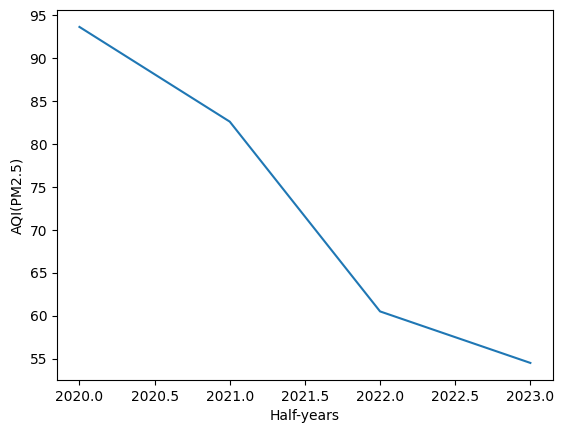

Uttar Pradesh


In [20]:
funding['Amount released during FY 2019-20'] = funding['Amount released during FY 2019-20'].replace('-', 0)
funding['Amount released during FY 2020-21'] = funding['Amount released during FY 2020-21'].replace('-', 0)
funding['Amount released during FY 2021-22'] = funding['Amount released during FY 2021-22'].replace('-', 0)
res = funding.groupby('State')['Total fund released'].sum()
st = res.idxmax()
years = [2020, 2021, 2022, 2023]
l = list()
for i in range(2020, 2024):
  hmmm = data.query(f"Timestamp >= '{i}-01-01' and Timestamp <= '{i}-12-31' and state == '{st}'")
  l.append(hmmm['PM2.5'].mean())
final = np.array(l)
plt.plot(years, final)
plt.ylabel("AQI(PM2.5)")
plt.xlabel("Half-years")
plt.show()
print(st)


Explanation: There was this inconsistency in the names of JnK which was fixed in .replace method. After that we noticed that there due to our filteration method, states like andhra pradesh were coming two times. So we used a set to take the intersection and populate the second array accordingly.

The increment has not really led to massive improvements. Minor improvements are seen in the month of October, but other than that, no real improvements. Explanation: Since the values were NaN in the months of Jan - Sep, we have used mean imputation to fill in the values. Other than that, we have used an f-string and a for loop to populate the data for different months. We used months because we were asked to make a time series, and months seemed reasonable as a measure of time. After this, it's just plotting.

# 4.

<Axes: >

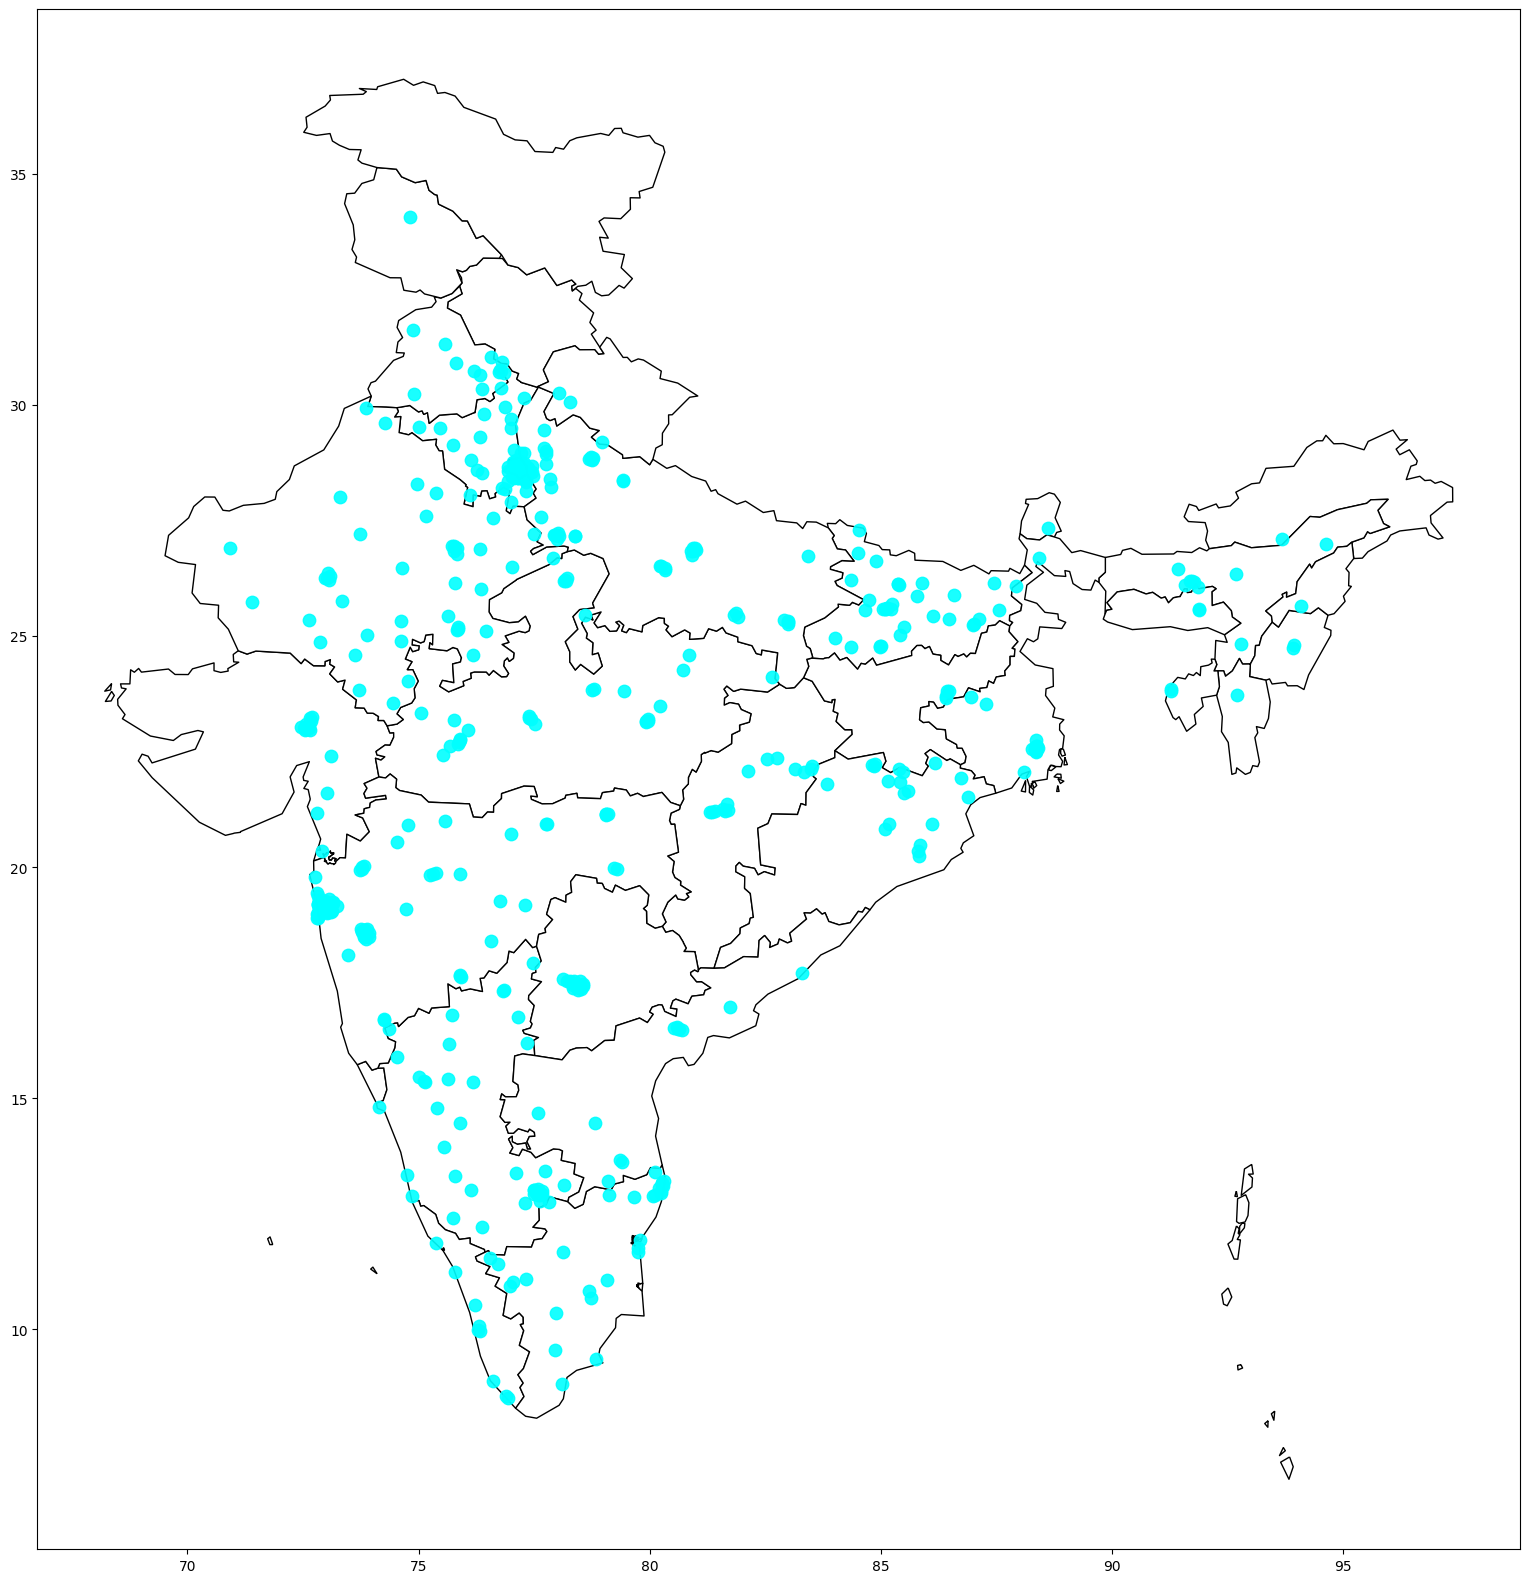

In [ ]:
india_states = gpd.read_file("/content/drive/MyDrive/india-polygon.shp")
coord = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude ))
coord.plot(ax=india_states.plot(color='white',edgecolor='black',figsize=(20,20)), marker='o',color='cyan',alpha=0.9, markersize=80)

.. The thing that intrigued me in the dataset is the was states with lower population density had levels of pollution in terms of avg PM2.5 levels.